# About Dataset
- Digital payments are evolving, but so are cyber criminals.

- According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

- In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

**This Dataset sourced by some unnamed institute.**

# Feature Explanation:

- distance_from_home - the distance from home where the transaction happened.

- distance_from_last_transaction - the distance from last transaction happened.

- ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

- repeat_retailer - Is the transaction happened from same retailer.

- used_chip - Is the transaction through chip (credit card).

- used_pin_number - Is the transaction happened by using PIN number.

- online_order - Is the transaction an online order.

- fraud - Is the transaction fraudulent.

**Ref : https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud**

# Get data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
transdata = pd.read_csv("/kaggle/input/credit-card-fraud/card_transdata.csv")
transdata

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# Exploratory data analysis and Preprocessing

In [3]:
df = transdata.copy()
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


((1000000, 8), None)

ดูสถิติเบื้องต้น ก็ปกติไม่มีค่าอะไรแปลก ๆ หรือติดลบ

In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


ไม่มีปัญหา multicollinearity -> logistic regression

<AxesSubplot:>

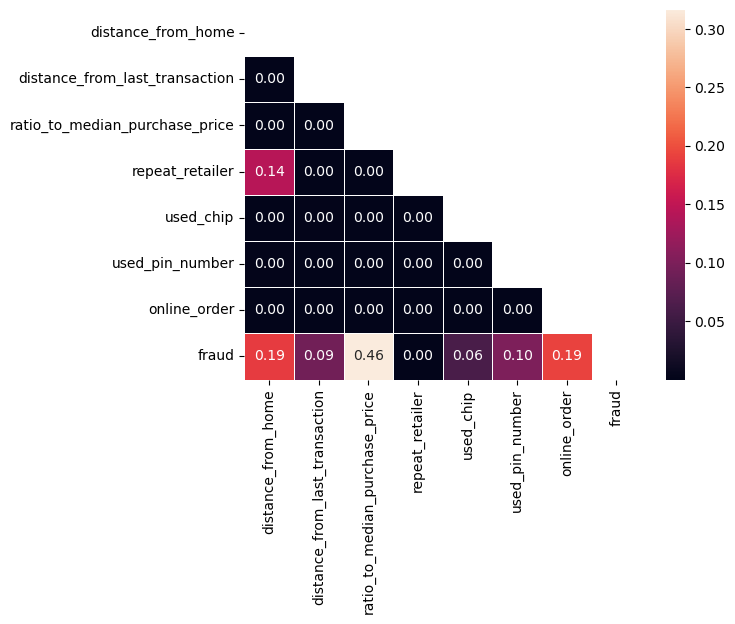

In [5]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, mask=mask, robust=True)

## Transformation

Before

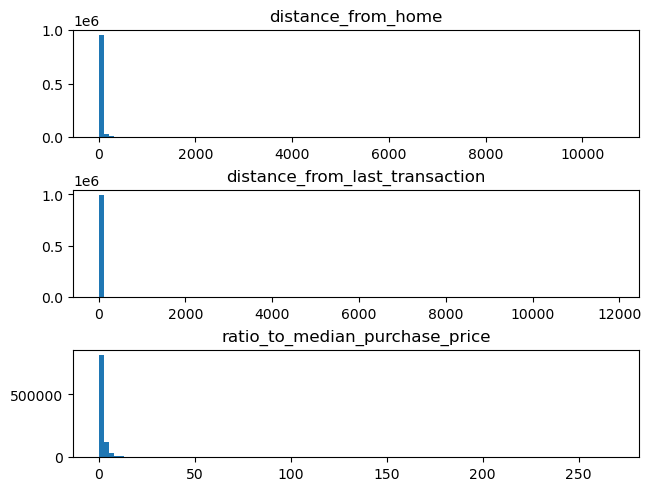

In [6]:
cols_num = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
fig, axs = plt.subplots(3,1, constrained_layout=True)
i = 0
for col in cols_num :
    axs[i].hist(df[col], bins=100)
    axs[i].set_title(col)
    i += 1
plt.show()

After log transformation

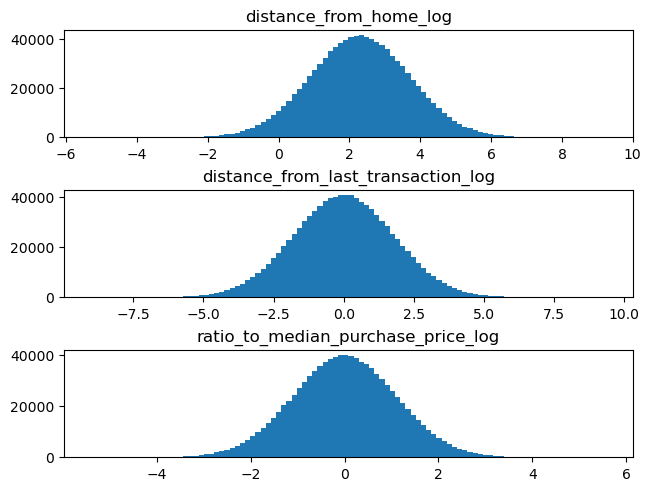

In [7]:
cols_num = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]

for col in cols_num :
    df[f"{col}_log"] = np.log(df[col])

fig, axs = plt.subplots(3,1, constrained_layout=True)
i = 0
for col in cols_num :
    axs[i].hist(df[f"{col}_log"], bins=100)
    axs[i].set_title(f"{col}_log")
    i += 1
plt.show()

## Handling outlier

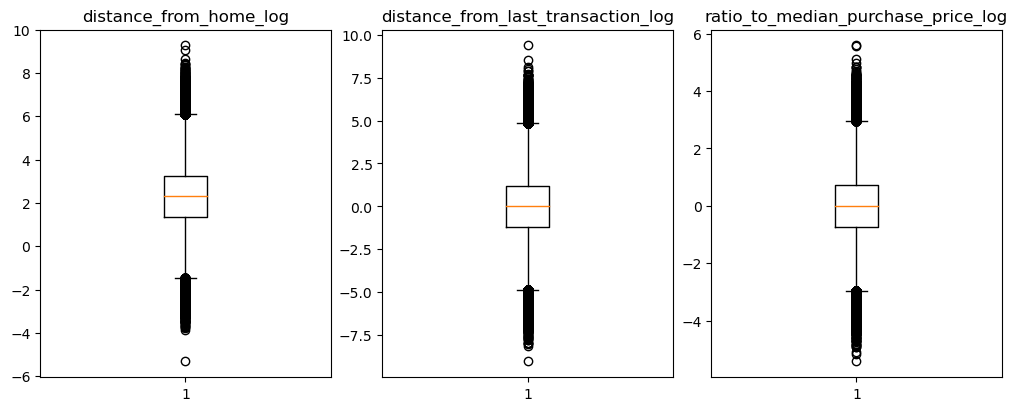

In [8]:
cols_num = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
fig, axs = plt.subplots(1, 3, figsize=(10, 4), constrained_layout=True)
i = 0
for col in cols_num :
    axs[i].boxplot(df[f"{col}_log"])
    axs[i].set_title(f"{col}_log")
    i += 1
plt.show()

outlier ค่อนข้างเยอะ -> แต่จะไม่จัดการเพราะมีผลในการ detact fraud

In [9]:
# lower = df["distance_from_home_log"].mean() - (3 * df["distance_from_home_log"].std())
upper = df["distance_from_home_log"].mean() + (3 * df["distance_from_home_log"].std())
mask = (df["distance_from_home_log"] > upper)
df[mask]["fraud"].mean()

0.4221556886227545

จะเห็นว่าถ้าลบ outlier ออกไป -> ในจำนวนที่ลบไปนั้นมี fraud ถึง 42.21 % เลยทีเดียว

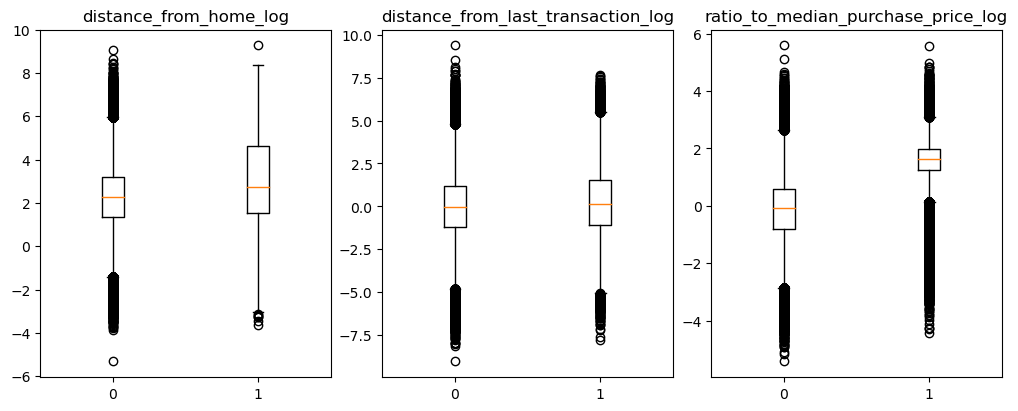

In [10]:
cols_num = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
fig, axs = plt.subplots(1, 3, figsize=(10, 4), constrained_layout=True)
i = 0
for col in cols_num :
    boxplot = df[df["fraud"] == 0][f"{col}_log"], df[df["fraud"] == 1][f"{col}_log"]
    axs[i].boxplot(boxplot, labels=["0", "1"])
    axs[i].set_title(f"{col}_log")
    i += 1
plt.show()

- distance_from_home : จะเห็นว่ารายการที่ fraud (1) จะมีช่วงที่กว้างกว่า **ดังนั้น** รายการที่เกิดขึ้นในระยะทางที่ไกลจากบ้านก็อาจจะเป็น fraud สูง

- distance_from_last_transaction : ไม่มีความแตกต่างในทั้งรายการที่ fraud (1) และรายการปกติ (0) **ดังนั้น** ไม่ว่ารายการนั้นจะเกิดขึ้นใกล้หรือไกลจากรายการล่าลุด ก็สามารถเป็นรายการ fraud ได้หมด

- ratio_to_median_purchase_price : รายการที่เป็น fraud จะมีค่าเฉลี่ยสูงกว่ารายการปกติ ซึ่งหมายความว่ารายการที่เป็น fraud จะมียอดซื้อที่สูงกว่าค่า median

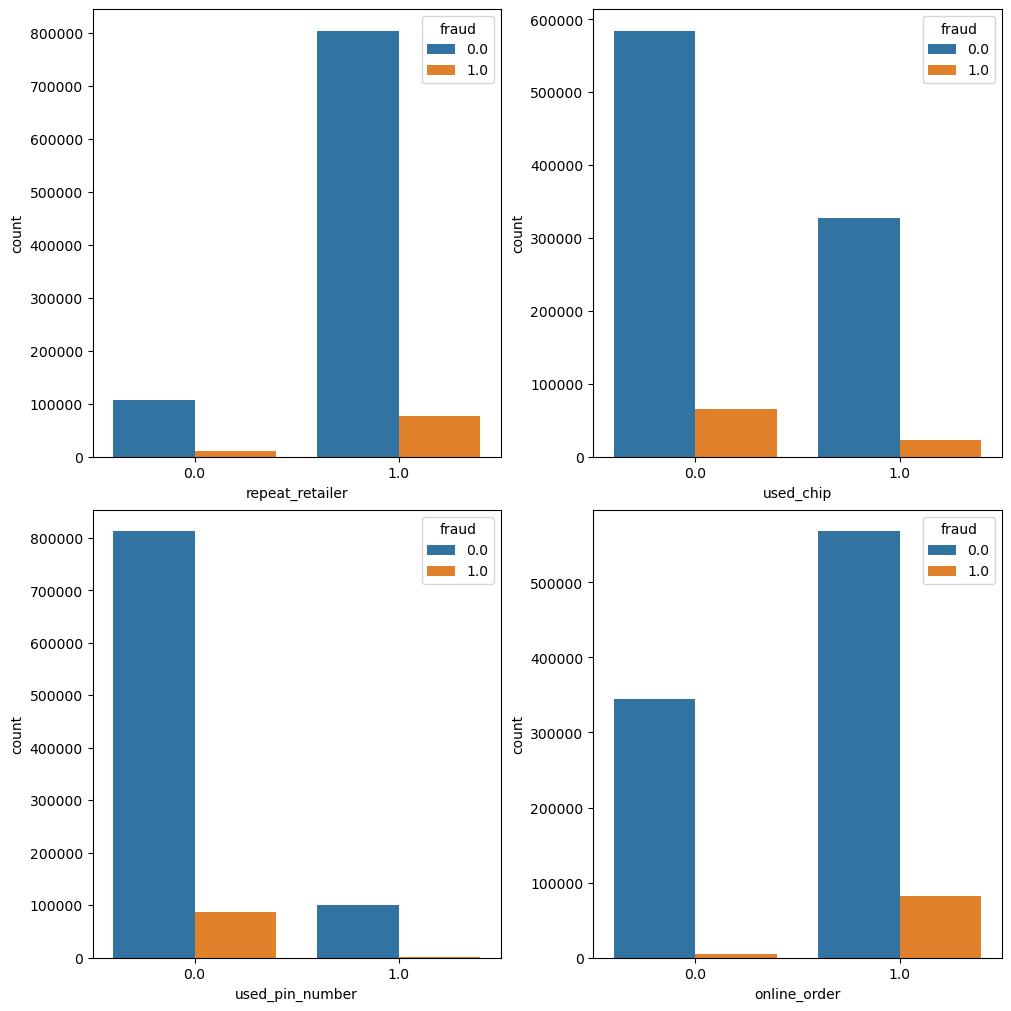

In [11]:
cols_cat = ["repeat_retailer", "used_chip", "used_pin_number", "online_order"]
i = 0
j = 0
fig, axs = plt.subplots(2, 2, figsize =(10,10), constrained_layout=True)
for col in cols_cat :
    sns.countplot(ax=axs[i,j],x=col, data=df, hue='fraud')
    if j < 1 :
        j += 1
    else :
        j = 0
        i += 1
plt.show()

- repeat_retailer : รายการ fraud ส่วนใหญ่จะเกิดในร้านค้าที่เคยทำธุรกรรมด้วยไว้แล้ว -> ร้านค้าจำเลขบัตรเครดิตหรือเปล่า?
- used_chip : รายการ fraud ส่วนใหญ่จะเกิดจากการที่ไม่ต้องใช้ chip หรือ credit card ตัวจริง (ส่วนใหญ่ก็คงจะเป็นรายการที่เกิดออนไลน์)
- used_pin_number : รายการ fraud ส่วนใหญ่จะเกิดจากการที่ไม่จำเป็นต้องใส่ pin เพื่อให้รายการสำเร็จ -> ซึ่งก็เป็นไปได้ถ้าสมมติฐานในข้อ 1 เป็นจริง
- online_order : รายการ fraud ส่วนใหญ่จะเกิดจากการทำธุรกรรมออนไลน์ -> ก็สมเหตุสมผลจากข้อ 2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   distance_from_home                  1000000 non-null  float64
 1   distance_from_last_transaction      1000000 non-null  float64
 2   ratio_to_median_purchase_price      1000000 non-null  float64
 3   repeat_retailer                     1000000 non-null  float64
 4   used_chip                           1000000 non-null  float64
 5   used_pin_number                     1000000 non-null  float64
 6   online_order                        1000000 non-null  float64
 7   fraud                               1000000 non-null  float64
 8   distance_from_home_log              1000000 non-null  float64
 9   distance_from_last_transaction_log  1000000 non-null  float64
 10  ratio_to_median_purchase_price_log  1000000 non-null  float64
dtypes: float64(1

## Train Test Split
1. train set
2. validation set
3. test set

In [13]:
cols_X = ["distance_from_home_log", 
          "distance_from_last_transaction_log", 
          "ratio_to_median_purchase_price_log", 
          "repeat_retailer", 
          "used_chip", 
          "used_pin_number", 
          "online_order"]
col_y = "fraud"

In [14]:
df_traintm = df[cols_X+[col_y]].sample(frac=0.8,random_state=2023)
df_test = df[cols_X+[col_y]].drop(df_traintm.index)

df_traintm.shape, df_test.shape

((800000, 8), (200000, 8))

In [15]:
df_train = df_traintm[cols_X+[col_y]].sample(frac=0.8,random_state=2023)
df_val = df_traintm[cols_X+[col_y]].drop(df_train.index)

df_train.shape, df_val.shape

((640000, 8), (160000, 8))

In [16]:
X_train = df_train[cols_X].values
X_val = df_val[cols_X].values
X_test = df_test[cols_X].values
y_train = df_train[col_y].values
y_val = df_val[col_y].values
y_test = df_test[col_y].values

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(640000, 7) (160000, 7) (200000, 7)
(640000,) (160000,) (200000,)


## Imbalanced

In [17]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler

In [18]:
rand = RandomOverSampler(random_state=2023, sampling_strategy='minority')
smote = SMOTE(random_state=2023, sampling_strategy='minority')
bord = BorderlineSMOTE(random_state=2023, sampling_strategy='minority')
adasyn = ADASYN(random_state=2023, sampling_strategy='minority')

In [19]:
X_train_rand, y_train_rand = rand.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_bord, y_train_bord = bord.fit_resample(X_train, y_train)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

In [20]:
from collections import Counter

In [21]:
print(f"original \t\t: {Counter(y_train)}")
print(f"RandomOverSampler \t: {Counter(y_train_rand)}")
print(f"SMOTE \t\t\t: {Counter(y_train_smote)}")
print(f"BorderlineSMOTE \t: {Counter(y_train_bord)}")
print(f"ADASYN \t\t\t: {Counter(y_train_ada)}")

original 		: Counter({0.0: 584114, 1.0: 55886})
RandomOverSampler 	: Counter({0.0: 584114, 1.0: 584114})
SMOTE 			: Counter({0.0: 584114, 1.0: 584114})
BorderlineSMOTE 	: Counter({0.0: 584114, 1.0: 584114})
ADASYN 			: Counter({0.0: 584114, 1.0: 583024})


# Modelling

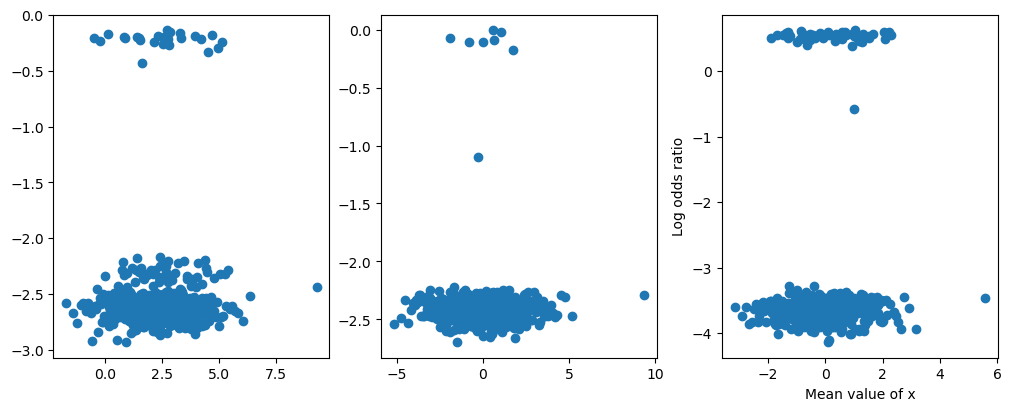

In [22]:
# Hide
def logitplot(y, x, ncat=500, axs=axs, i=None, j=None):
    brksx = np.unique(np.quantile(x, np.arange(ncat+1)/ncat))
    cutx = pd.cut(x, bins=brksx, include_lowest=True)
    yt = pd.crosstab(y, cutx)
    mx = cutx.apply(lambda x: np.mean(x.right)).unique()
    logity = np.log((yt.iloc[1,:] + 0.5) / (yt.iloc[0,:] + 0.5))
    if axs is not None:
        axs.plot(mx, logity, 'o')
    else :
        plt.plot(mx, logity, 'o')
    plt.xlabel('Mean value of x')
    plt.ylabel('Log odds ratio')

fig, axs = plt.subplots(1, 3, figsize=(10, 4), constrained_layout=True)
for i in range(3):
        logitplot(df["fraud"], df[cols_X[i]], axs=axs[i])

In [23]:
score = dict()
score["model"] = []
score["resampling"] = []
score["recall"] = []
score["precision"] = []
score["f1"] = []
score["accuracy"] = []
score["auc"] = []

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

No oversampling

In [25]:
log_reg = LogisticRegression(random_state=2023, multi_class='ovr', n_jobs=-1)
log_reg.fit(X_train, y_train)

y_val_pred = log_reg.predict(X_val)
y_val_pred_prob = log_reg.predict_proba(X_val)

score["model"].append("logistict Regression")
score["resampling"].append("No")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.94145


Random Oversampling

In [26]:
log_reg = LogisticRegression(random_state=2023, multi_class='ovr', n_jobs=-1)
log_reg.fit(X_train_rand, y_train_rand)

y_val_pred = log_reg.predict(X_val)
y_val_pred_prob = log_reg.predict_proba(X_val)

score["model"].append("logistict Regression")
score["resampling"].append("Random oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272


Smote

In [27]:
log_reg = LogisticRegression(random_state=2023, multi_class='ovr', n_jobs=-1)
log_reg.fit(X_train_smote, y_train_smote)

y_val_pred = log_reg.predict(X_val)
y_val_pred_prob = log_reg.predict_proba(X_val)

score["model"].append("logistict Regression")
score["resampling"].append("Smote oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270


Borderline Smote

In [28]:
log_reg = LogisticRegression(random_state=2023, multi_class='ovr', n_jobs=-1)
log_reg.fit(X_train_bord, y_train_bord)

y_val_pred = log_reg.predict(X_val)
y_val_pred_prob = log_reg.predict_proba(X_val)

score["model"].append("logistict Regression")
score["resampling"].append("Borderline smote oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498


Adasyn

In [29]:
log_reg = LogisticRegression(random_state=2023, multi_class='ovr', n_jobs=-1)
log_reg.fit(X_train_ada, y_train_ada)

y_val_pred = log_reg.predict(X_val)
y_val_pred_prob = log_reg.predict_proba(X_val)

score["model"].append("logistict Regression")
score["resampling"].append("Adasyn oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535


Class Weights

In [30]:
log_reg = LogisticRegression(random_state=2023, multi_class='ovr', class_weight="balanced", n_jobs=-1)
log_reg.fit(X_train, y_train)

y_val_pred = log_reg.predict(X_val)
y_val_pred_prob = log_reg.predict_proba(X_val)

score["model"].append("logistict Regression")
score["resampling"].append("Class weight")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262


## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

No oversampling

In [32]:
clf_tree = DecisionTreeClassifier(random_state=2023)
clf_tree.fit(X_train, y_train)

y_val_pred = clf_tree.predict(X_val)
y_val_pred_prob = clf_tree.predict_proba(X_val)

score["model"].append("Decision Tree Classifier")
score["resampling"].append("No")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997


Random Oversampling

In [33]:
clf_tree = DecisionTreeClassifier(random_state=2023)
clf_tree.fit(X_train_rand, y_train_rand)

y_val_pred = clf_tree.predict(X_val)
y_val_pred_prob = clf_tree.predict_proba(X_val)

score["model"].append("Decision Tree Classifier")
score["resampling"].append("Random oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997


Smote

In [34]:
clf_tree = DecisionTreeClassifier(random_state=2023)
clf_tree.fit(X_train_smote, y_train_smote)

y_val_pred = clf_tree.predict(X_val)
y_val_pred_prob = clf_tree.predict_proba(X_val)

score["model"].append("Decision Tree Classifier")
score["resampling"].append("Smote oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990


Borderline Smote

In [35]:
clf_tree = DecisionTreeClassifier(random_state=2023)
clf_tree.fit(X_train_bord, y_train_bord)

y_val_pred = clf_tree.predict(X_val)
y_val_pred_prob = clf_tree.predict_proba(X_val)

score["model"].append("Decision Tree Classifier")
score["resampling"].append("Borderline smote oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


Adasyn

In [36]:
clf_tree = DecisionTreeClassifier(random_state=2023)
clf_tree.fit(X_train_ada, y_train_ada)

y_val_pred = clf_tree.predict(X_val)
y_val_pred_prob = clf_tree.predict_proba(X_val)

score["model"].append("Decision Tree Classifier")
score["resampling"].append("Adasyn oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


Class Weights

In [37]:
clf_tree = DecisionTreeClassifier(random_state=2023, class_weight="balanced")
clf_tree.fit(X_train, y_train)

y_val_pred = clf_tree.predict(X_val)
y_val_pred_prob = clf_tree.predict_proba(X_val)

score["model"].append("Decision Tree Classifier")
score["resampling"].append("Class weight")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


## K Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

No oversampling

In [39]:
clf_knn = KNeighborsClassifier(n_jobs=-1)
clf_knn.fit(X_train, y_train)

y_val_pred = clf_knn.predict(X_val)
y_val_pred_prob = clf_knn.predict_proba(X_val)

score["model"].append("K Neighbors Classifier")
score["resampling"].append("No")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


Random Oversampling

In [40]:
clf_knn = KNeighborsClassifier(n_jobs=-1)
clf_knn.fit(X_train_rand, y_train_rand)

y_val_pred = clf_knn.predict(X_val)
y_val_pred_prob = clf_knn.predict_proba(X_val)

score["model"].append("K Neighbors Classifier")
score["resampling"].append("Random oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


Smote

In [41]:
clf_knn = KNeighborsClassifier(n_jobs=-1)
clf_knn.fit(X_train_smote, y_train_smote)

y_val_pred = clf_knn.predict(X_val)
y_val_pred_prob = clf_knn.predict_proba(X_val)

score["model"].append("K Neighbors Classifier")
score["resampling"].append("Smote oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


Borderline Smote

In [42]:
clf_knn = KNeighborsClassifier(n_jobs=-1)
clf_knn.fit(X_train_bord, y_train_bord)

y_val_pred = clf_knn.predict(X_val)
y_val_pred_prob = clf_knn.predict_proba(X_val)

score["model"].append("K Neighbors Classifier")
score["resampling"].append("Borderline smote oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


Adasyn

In [43]:
clf_knn = KNeighborsClassifier(n_jobs=-1)
clf_knn.fit(X_train_ada, y_train_ada)

y_val_pred = clf_knn.predict(X_val)
y_val_pred_prob = clf_knn.predict_proba(X_val)

score["model"].append("K Neighbors Classifier")
score["resampling"].append("Adasyn oversampling")
score["recall"].append(recall_score(y_val, y_val_pred))
score["precision"].append(precision_score(y_val, y_val_pred))
score["f1"].append(f1_score(y_val, y_val_pred))
score["accuracy"].append(accuracy_score(y_val, y_val_pred))
score["auc"].append(roc_auc_score(y_val, y_val_pred_prob[:, 1]))

pd.DataFrame.from_dict(score)

,model,resampling,recall,precision,f1,accuracy,auc
0,logistict Regression,No,0.554328,0.797191,0.653938,0.948569,0.941450
1,logistict Regression,Random oversampling,0.886140,0.361035,0.513044,0.852537,0.943272
2,logistict Regression,Smote oversampling,0.886283,0.360810,0.512841,0.852394,0.943270
3,logistict Regression,Borderline smote oversampling,0.929488,0.298945,0.452391,0.802737,0.940498
4,logistict Regression,Adasyn oversampling,0.927991,0.304368,0.458391,0.807763,0.941535
5,logistict Regression,Class weight,0.886497,0.360793,0.512859,0.852369,0.943262
6,Decision Tree Classifier,No,1.000000,0.999929,0.999964,0.999994,0.999997
7,Decision Tree Classifier,Random oversampling,1.000000,0.999929,0.999964,0.999994,0.999997
8,Decision Tree Classifier,Smote oversampling,1.000000,0.999786,0.999893,0.999981,0.999990
9,Decision Tree Classifier,Borderline smote oversampling,1.000000,0.999288,0.999644,0.999938,0.999966


In [44]:
df_score = pd.DataFrame.from_dict(score)

# Conclusion

In [45]:
for col in df_score.columns[2:] :
    display(df_score[df_score[col] == df_score[col].max()][["model", "resampling"]])

,model,resampling
6,Decision Tree Classifier,No
7,Decision Tree Classifier,Random oversampling
8,Decision Tree Classifier,Smote oversampling
9,Decision Tree Classifier,Borderline smote oversampling
10,Decision Tree Classifier,Adasyn oversampling
11,Decision Tree Classifier,Class weight


,model,resampling
6,Decision Tree Classifier,No
7,Decision Tree Classifier,Random oversampling
11,Decision Tree Classifier,Class weight


,model,resampling
6,Decision Tree Classifier,No
7,Decision Tree Classifier,Random oversampling
11,Decision Tree Classifier,Class weight


,model,resampling
6,Decision Tree Classifier,No
7,Decision Tree Classifier,Random oversampling
11,Decision Tree Classifier,Class weight


,model,resampling
6,Decision Tree Classifier,No
7,Decision Tree Classifier,Random oversampling
11,Decision Tree Classifier,Class weight


- Decision Tree Classifier มีประสิทธิภาพดีที่สุดในการตรวจจับรายการ fraud
- class imbalanced ไม่มีผลต่อตัว model เพราะถึงจะไม่ทำ oversampling หรือใส่ weights ก็ได้ผลที่เหมือนกัน

## Confirm in test set

In [46]:
clf_tree = DecisionTreeClassifier(class_weight="balanced")
clf_tree.fit(X_train, y_train)

y_test_pred = clf_tree.predict(X_test)
y_test_pred_prob = clf_tree.predict_proba(X_test)

print(classification_report(y_test, y_test_pred, digits=6))

              precision    recall  f1-score   support

         0.0   0.999989  0.999995  0.999992    182509
         1.0   0.999943  0.999886  0.999914     17491

    accuracy                       0.999985    200000
   macro avg   0.999966  0.999940  0.999953    200000
weighted avg   0.999985  0.999985  0.999985    200000



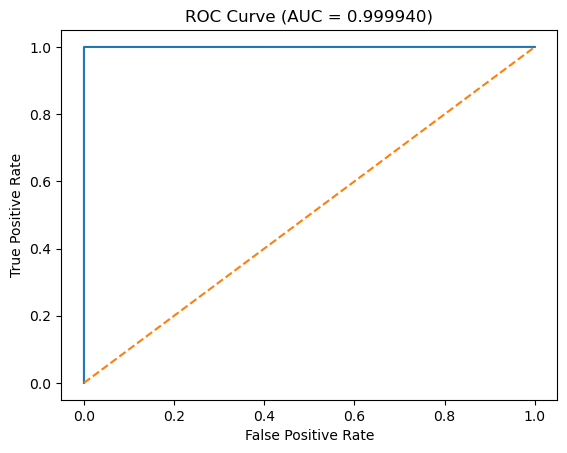

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob[:, 1])
auc = roc_auc_score(y_test, y_test_pred_prob[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.6f})'.format(auc))
plt.show()